In [1]:
# import all needed R packages
library(ChAMP)
library(ChAMPdata)
library(ggplot2)
library(stringr)
library(ggpubr)

Lade nötiges Paket: minfi

Lade nötiges Paket: BiocGenerics

Lade nötiges Paket: generics


Attache Paket: ‘generics’


Die folgenden Objekte sind maskiert von ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Lade nötiges Paket: GenomicRanges

Lade nötiges Paket: stats4

Lade nötiges Paket: S4Vectors


Attache Paket: ‘S4Vectors’


Das folgende Objekt ist maskiert ‘package:utils’:

In [20]:
mystery_1 <- "../../example_datasets/epicv2/mystery_data_1"
mystery_2 <- "../../example_datasets/epicv2/mystery_data_2"

### Analyse mystery_data_1
Laden Sie den Datensatz im Verzeichnis mystery_data_1 und schauen Sie sich den **Output von champ.laod** die **QC Plots** an:
- Was fällt Ihnen am Output von champ.load auf?
- Wozu führt die Änderung des *detPcut* Parameters in *champ.load*?
- Warum wurde der Parameter verändert?
- Was fällt Ihnen an den Plots auf?
- Worauf könnte das zu sehende hindeuten?
- Wie könnten Sie damit umgehen?

In [21]:
# all parameters except one are default
myData_1 <- champ.load(directory = fragmented,
                     method="ChAMP",
                     methValue="B",
                     autoimpute=TRUE,
                     filterDetP=TRUE,
                     ProbeCutoff=0,
                     SampleCutoff=0.1,
                     detPcut=0.9, # This is the only parameter which was changed compared to the default settings of champ.load
                     filterBeads=TRUE,
                     beadCutoff=0.05,
                     filterNoCG=TRUE,
                     filterSNPs=TRUE,
                     population=NULL,
                     filterMultiHit=TRUE,
                     filterXY=TRUE,
                     force=FALSE,
                     arraytype="EPICv2")


[===========================]

[<<<< ChAMP.LOAD START >>>>>]

-----------------------------


[ Loading Data with ChAMP Method ]

----------------------------------

Note that ChAMP method will NOT return rgSet or mset, they object defined by minfi. Which means, if you use ChAMP method to load data, you can not use SWAN or FunctionNormliazation method in champ.norm() (you can use BMIQ or PBC still). But All other function should not be influenced.


[===========================]

[<<<< ChAMP.IMPORT START >>>>>]

-----------------------------


[ Section 1: Read PD Files Start ]

  CSV Directory: ../../example_datasets/epicv2/mystery_data_1/samplesheet.csv

  Find CSV Success

  Reading CSV File

  Replace Sentrix_Position into Array

  Replace Sentrix_ID into Slide

[ Section 1: Read PD file Done ]



[ Section 2: Read IDAT files Start ]

  Loading:../../example_datasets/epicv2/mystery_data_1/data_directory/111111111111/111111111111_R05C01_Grn.idat ---- (1/20)

  Loading:../../example_

         Failed CpG Fraction.
sample1            0.10990604
sample2            0.12215718
sample3            0.08568867
sample4            0.05344083
sample5            0.10018195
sample6            0.13114598
sample7            0.09822582
sample8            0.14327761
sample9            0.08778353
sample10           0.12545261
sample11           0.10311028
sample12           0.05736163
sample13           0.09452807
sample14           0.12113803
sample15           0.09212480
sample16           0.11706463
sample17           0.11174371
sample18           0.10414223
sample19           0.05110693
sample20           0.04452780



    The detSamplecut parameter is : 0.1

    Samples : sample1,sample2,sample5,sample6,sample8,sample10,sample11,sample14,sample16,sample17,sample18 will be deleted.

    There are 9 samples remained for analysis.


    Filtering probes with a detection p-value above 0.9.

    Removing 440434 probes.

    If a large number of probes have been removed, ChAMP suggests you to identify potentially bad samples


  Filtering BeadCount Start

    Filtering probes with a beadcount <3 in at least 5% of samples.

    Removing 12688 probes


  Filtering NoCG Start

    Only Keep CpGs, removing 1292 probes from the analysis.


  Filtering SNPs Start


    !!! Important, since version 2.29.1, ChAMP set default `EPIC` arraytype as EPIC version 2. 
        You can set 'EPIC' or 'EPICv2' to use version 2 EPIC annotation
        If you want to use the old version (v1), please specify arraytype parameter as `EPICv1`. 
        For 450K array, still use `450K`


    Using general mask options

    Removi

[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/

[QC plots will be proceed with 452103 probes and 9 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




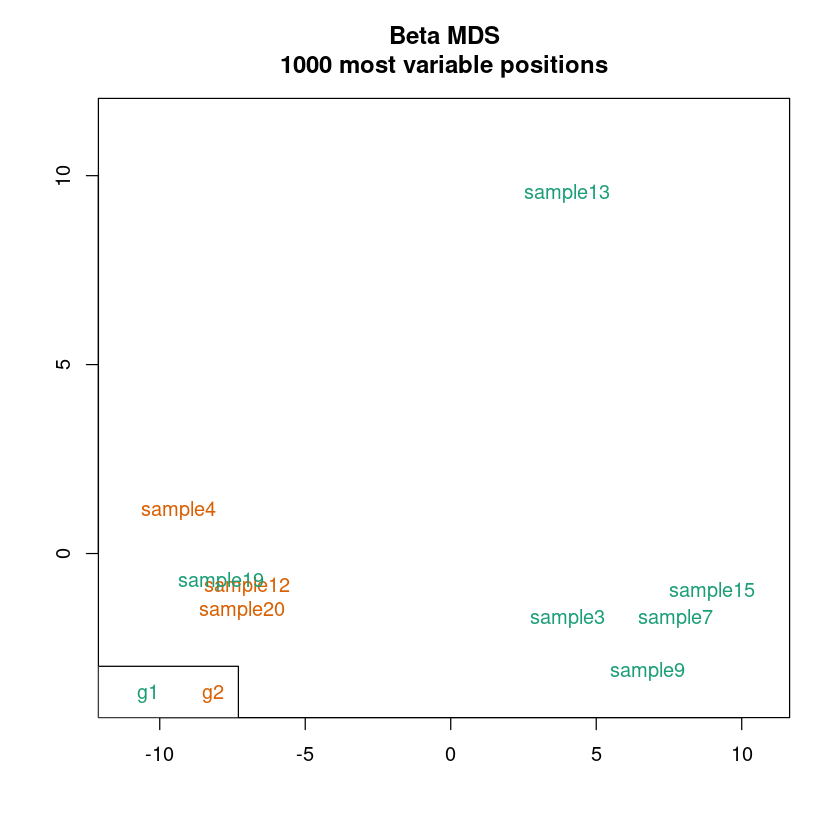

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



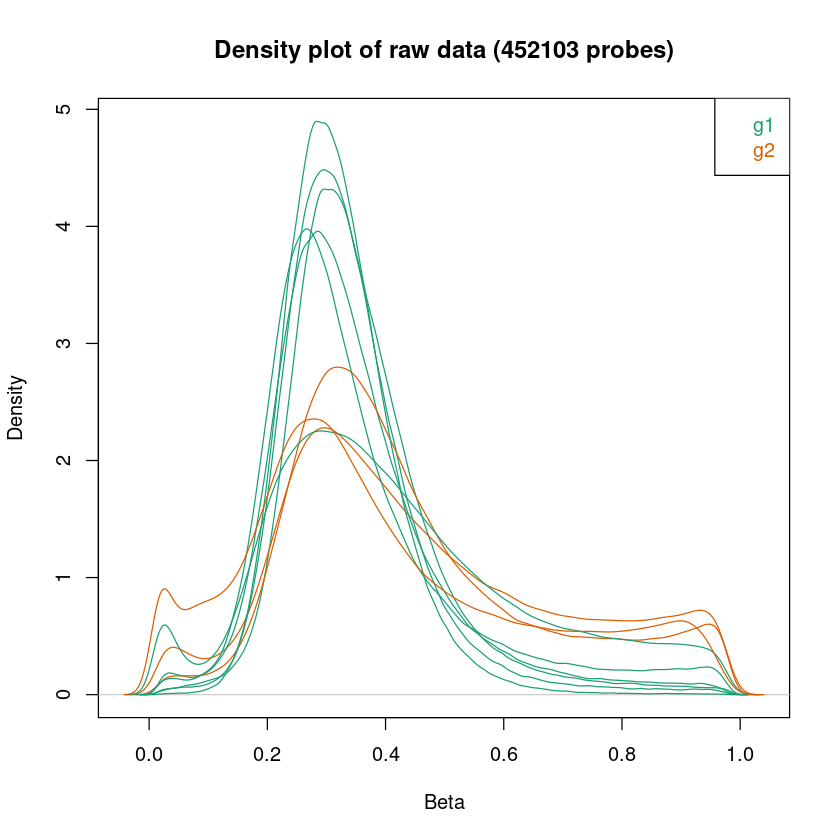

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




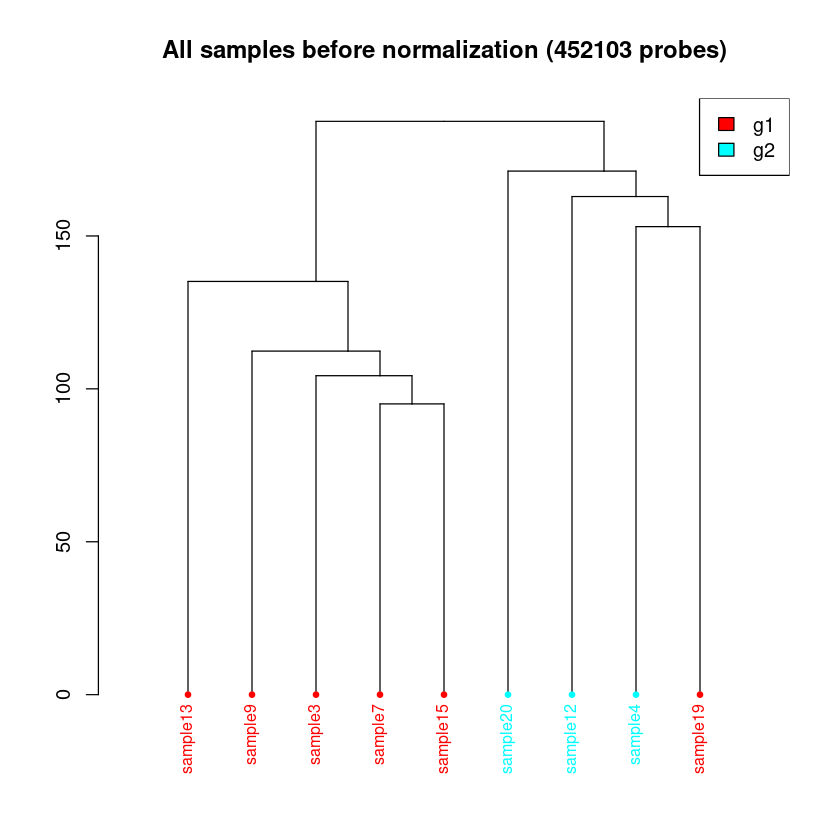

In [24]:
champ.QC(beta = myData_1$beta,
         pheno=myData_1$pd$Sample_Group,
         resultsDir="./CHAMP_QCimages/")

### Analyse mystery_data_2
Laden Sie den Datensatz im Verzeichnis mystery_data_2 und schauen Sie sich die QC Plots an:
- Was fällt Ihnen an den Plots auf?
- Worauf könnte das zu sehende hindeuten?
- Wie könnten Sie damit umgehen?

In [18]:
# parameters are all default
myData_2 <- champ.load(directory = intra_group_outlier,
                     method="ChAMP",
                     methValue="B",
                     autoimpute=TRUE,
                     filterDetP=TRUE,
                     ProbeCutoff=0,
                     SampleCutoff=0.1,
                     detPcut=0.01,
                     filterBeads=TRUE,
                     beadCutoff=0.05,
                     filterNoCG=TRUE,
                     filterSNPs=TRUE,
                     population=NULL,
                     filterMultiHit=TRUE,
                     filterXY=TRUE,
                     force=FALSE,
                     arraytype="EPICv2")

[===========================]

[<<<< ChAMP.LOAD START >>>>>]

-----------------------------


[ Loading Data with ChAMP Method ]

----------------------------------

Note that ChAMP method will NOT return rgSet or mset, they object defined by minfi. Which means, if you use ChAMP method to load data, you can not use SWAN or FunctionNormliazation method in champ.norm() (you can use BMIQ or PBC still). But All other function should not be influenced.


[===========================]

[<<<< ChAMP.IMPORT START >>>>>]

-----------------------------


[ Section 1: Read PD Files Start ]

  CSV Directory: ../../example_datasets/epicv2/mystery_data_2/samplesheet.csv

  Find CSV Success

  Reading CSV File

  Replace Sentrix_Position into Array

  Replace Sentrix_ID into Slide

[ Section 1: Read PD file Done ]



[ Section 2: Read IDAT files Start ]

  Loading:../../example_datasets/epicv2/mystery_data_2/111111111111/111111111111_R01C01_Grn.idat ---- (1/9)

  Loading:../../example_datasets/epicv2/

        Failed CpG Fraction.
sample1          0.008623827
sample2          0.009623768
sample3          0.010284348
sample4          0.008498968
sample5          0.008403989
sample6          0.010018622
sample7          0.012234074
sample8          0.006075417
sample9          0.008782836



    Filtering probes with a detection p-value above 0.01.

    Removing 23273 probes.

    If a large number of probes have been removed, ChAMP suggests you to identify potentially bad samples


  Filtering BeadCount Start

    Filtering probes with a beadcount <3 in at least 5% of samples.

    Removing 12573 probes


  Filtering NoCG Start

    Only Keep CpGs, removing 3508 probes from the analysis.


  Filtering SNPs Start


    !!! Important, since version 2.29.1, ChAMP set default `EPIC` arraytype as EPIC version 2. 
        You can set 'EPIC' or 'EPICv2' to use version 2 EPIC annotation
        If you want to use the old version (v1), please specify arraytype parameter as `EPICv1`. 
        For 450K array, still use `450K`


    Using general mask options

    Removing 30917 probes from the analysis.


  Filtering MultiHit Start

    Filtering probes that align to multiple locations as identified in Nordlund et al

    Removing 0 probes from the analysis.


  Filtering XY Start


[===========================]

[<<<<< ChAMP.QC START >>>>>>]

-----------------------------

champ.QC Results will be saved in ./CHAMP_QCimages/

[QC plots will be proceed with 846304 probes and 9 samples.]


<< Prepare Data Over. >>

<< plot mdsPlot Done. >>




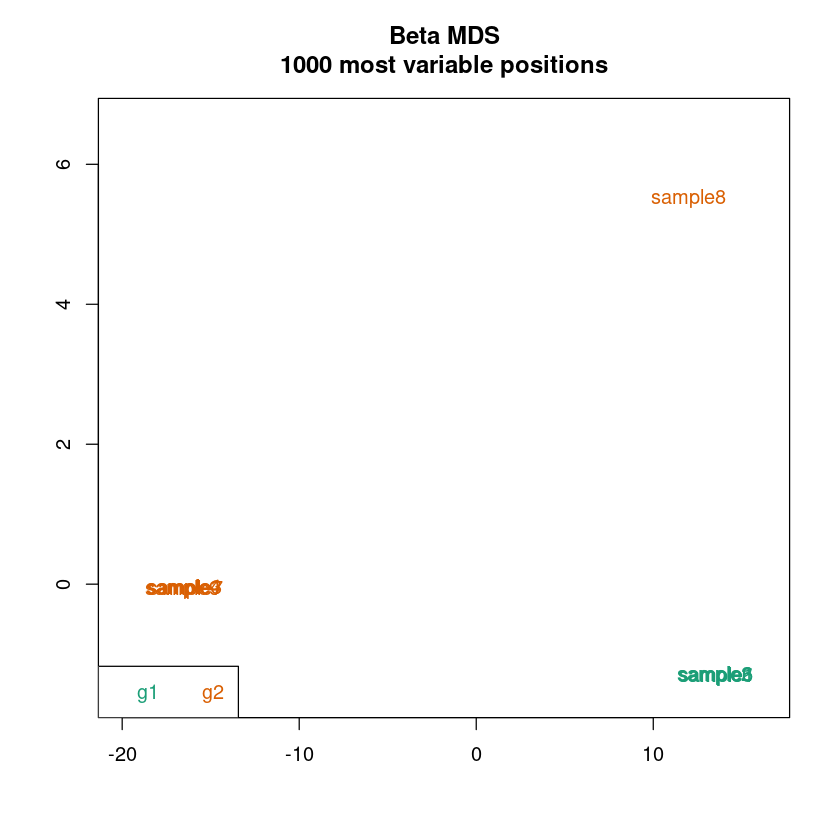

<< Plot densityPlot Done. >>


< Dendrogram Plot Feature Selection Method >: No Selection, directly use all CpGs to calculate distance matrix.



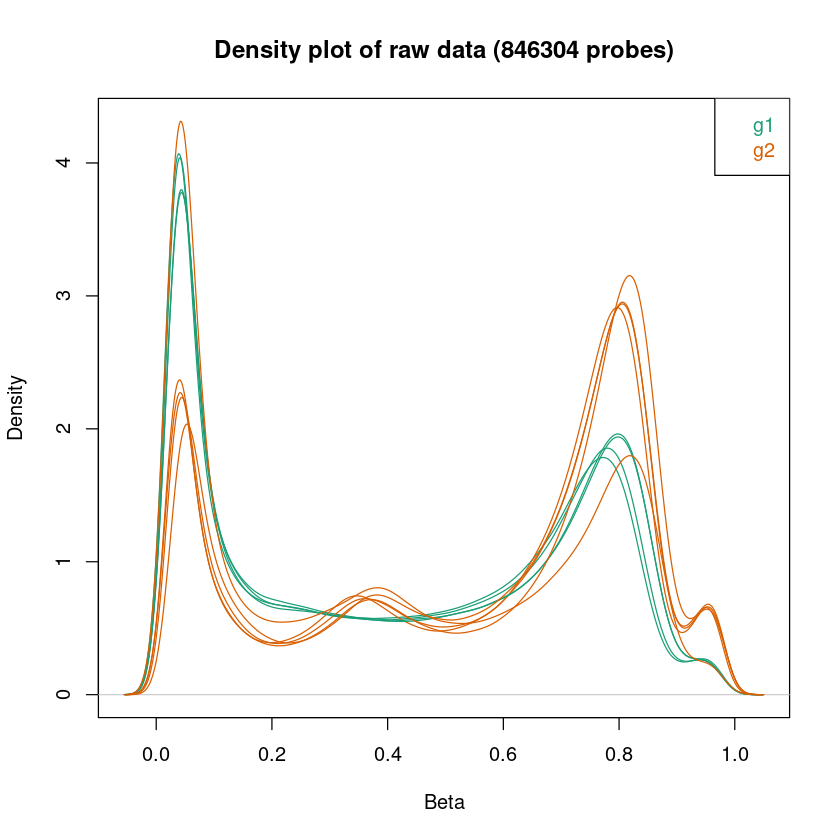

<< Plot dendrogram Done. >>


[<<<<<< ChAMP.QC END >>>>>>>]

[===========================]

[You may want to process champ.norm() next.]




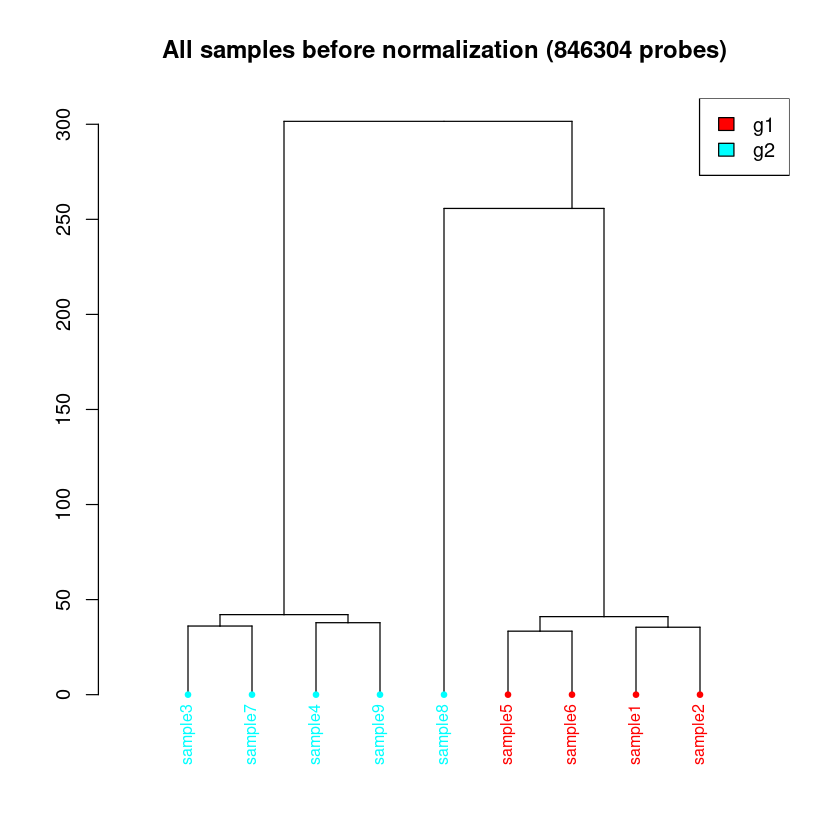

In [23]:
champ.QC(beta = myData_2$beta,
         pheno=myData_2$pd$Sample_Group,
         resultsDir="./CHAMP_QCimages/")